In [1]:
# import required libraries
import pandas as pd                  # for performing EDA
import numpy as np                   # for Linear Algebric operations
import matplotlib.pyplot as plt      # for Data Visualization
import seaborn as sns                # for Data Visualization
import os                            # getting access to input files
from collections import Counter
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# working directory
os.chdir("F:/edWisor/Bike Rental")

In [4]:
# loading data
df=pd.read_csv("day.csv")

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
df.shape

(731, 16)

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#Converting variables datatype to required datatypes

df['dteday'] = pd.to_datetime(df['dteday'],yearfirst = True)
df['season'] = df['season'].astype(str)
df['yr']     = df['yr'].astype(str)
df['mnth']   = df['mnth'].astype(str)
df['holiday']= df['holiday'].astype(str)
df['weekday']= df['weekday'].astype(str)
df['workingday']= df['workingday'].astype(str)
df['weathersit']= df['weathersit'].astype(str)

In [10]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [11]:
# checking missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

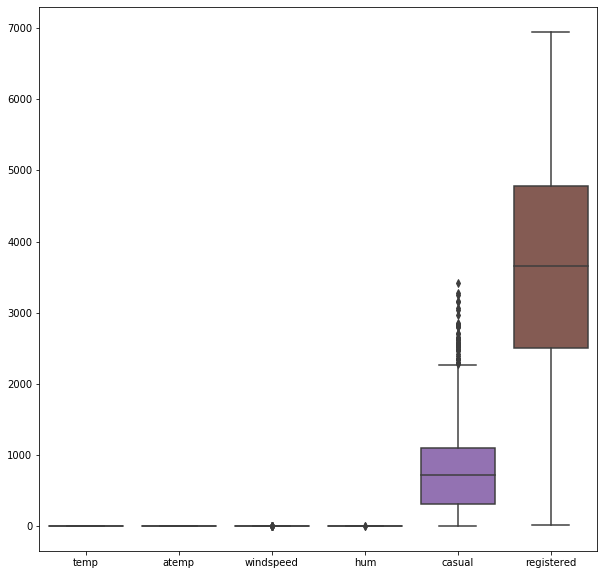

In [12]:
# checking boxplot of continous variables

%matplotlib inline
sns.boxplot(data=df[['temp','atemp','windspeed','hum','casual','registered']])
fig=plt.gcf()
fig.set_size_inches(10,10)

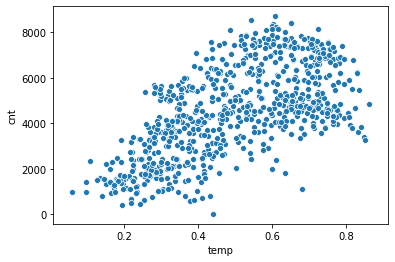

In [13]:
#Scatter plot for temp against cnt 
sns.scatterplot(data=df,x='temp',y='cnt')

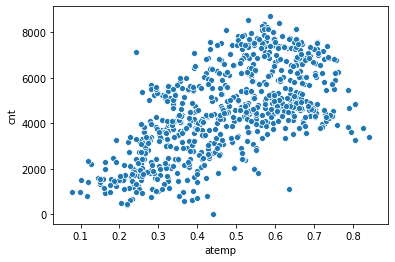

In [14]:
#Scatter plot for atemp against cnt 
sns.scatterplot(data=df,x='atemp',y='cnt')

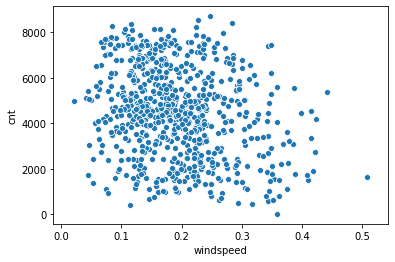

In [15]:
#Scatter plot for windspeed against cnt 
sns.scatterplot(data=df,x='windspeed',y='cnt')

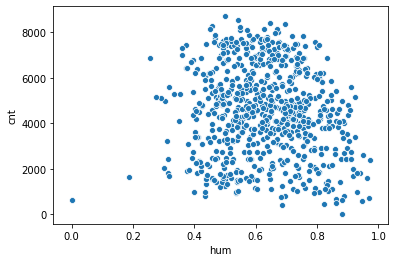

In [16]:
#Scatter plot for hum against cnt 
sns.scatterplot(data=df,x='hum',y='cnt')

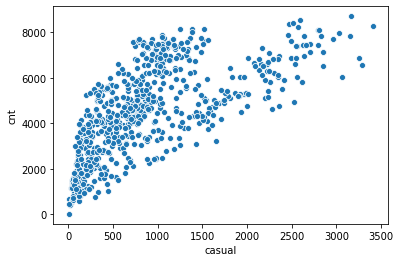

In [17]:
#Scatter plot for casual against cnt 
sns.scatterplot(data=df,x='casual',y='cnt')

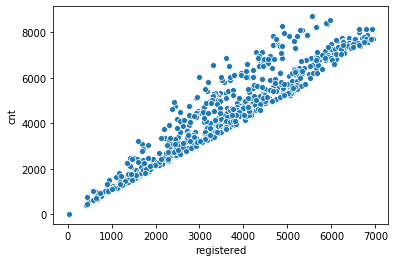

In [18]:
#Scatter plot for registered against cnt 
sns.scatterplot(data=df,x='registered',y='cnt')

In [19]:
# from the boxplot analysis, it is clear that continous variables windspeed, hum and casual includes the outliers.
# but we are not considering casual because this is not predictor variable.

count_names = ['windspeed','hum']
for i in count_names:
    print (i)
    q75,q25 = np.percentile(df.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    
    df.loc[df[i]<min,i]=np.nan
    df.loc[df[i]>max,i]=np.nan

windspeed
-0.012446750000000034
0.38061125
hum
0.20468725
1.0455212500000002


In [20]:
# checking missing values
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual         0
registered     0
cnt            0
dtype: int64

In [21]:
#taking copy of the data

df_copy = df.copy()
#df = df_copy.copy()

In [22]:
# hum includes 2 outlier and windspeed includes 13 outliers. so drop the outlier rows.

df = df.dropna(axis = 0)

In [23]:
df.shape

(717, 16)

In [24]:
# checking missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

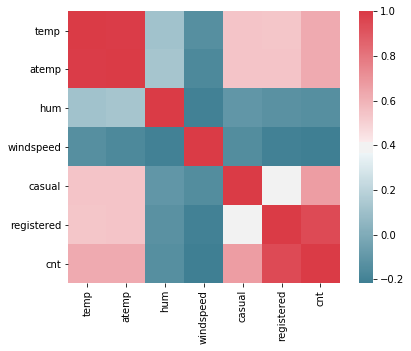

In [25]:
# Correlation Analysis on continous variables
# generating heatmap

cnames = ['temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df_corr = df.loc[:,cnames]
f, ax = plt.subplots(figsize=(7, 5))

# correlation matrix
corr = df_corr.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [26]:
# checking VIF for multicolinerity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_df = add_constant(df.iloc[:,9:15])
pd.Series([variance_inflation_factor(VIF_df.values, i) 
               for i in range(VIF_df.shape[1])], 
              index=VIF_df.columns)

const         54.847289
temp          63.442490
atemp         64.309759
hum            1.179328
windspeed      1.154450
casual         1.502061
registered     1.561168
dtype: float64

In [27]:
# now chi square test for categorical variables

# saving categorical variables name in lis

lis = []
for i in range(0, df.shape[1]):
    if(df.iloc[:,i].dtypes == 'object'):
        lis.append(df.columns[i])
lis

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [28]:
from scipy.stats import chi2_contingency

# making every combinationfrom cat_columns
factors_paired = [(i,j) for i in lis for j in lis]
factors_paired
p_values = [] 
from scipy.stats import chi2_contingency 
for factor in factors_paired:
    if factor[0] != factor[1]:
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(df[factor[0]], df[factor[1]]))
        p_values.append(p.round(3))
    else:
        p_values.append('-') 
p_values = np.array(p_values).reshape((7,7))
p_values = pd.DataFrame(p_values, index=lis, columns=lis)
print(p_values)

           season     yr   mnth holiday weekday workingday weathersit
season          -  0.999    0.0   0.641     1.0      0.946      0.013
yr          0.999      -    1.0   0.995     1.0      0.956      0.183
mnth          0.0    1.0      -   0.571     1.0      0.993       0.01
holiday     0.641  0.995  0.571       -     0.0        0.0      0.599
weekday       1.0    1.0    1.0     0.0       -        0.0      0.249
workingday  0.946  0.956  0.993     0.0     0.0          -      0.294
weathersit  0.013  0.183   0.01   0.599   0.249      0.294          -


In [29]:
#From heatmap and VIF, Removing variables atemp beacuse it is highly correlated with temp,
#From chi2, Removing weekday, holiday because they don't contribute much to the independent variable
#Removing Causal and registered becuase that's what we need to predict.
#Removing instant and dteday because they are not useful in generating model.

df = df.drop(columns=['instant','dteday','atemp','casual','registered','holiday','weekday'])

In [30]:
df.head()

,season,yr,mnth,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,1,1,0.226957,0.436957,0.186900,1600


In [31]:
#taking copy of the data

df_clean = df.copy()
#df = df_clean.copy()

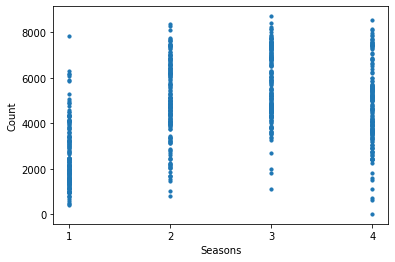

In [32]:
# check relationship between count and season

plt.scatter(x=df['season'], y=df['cnt'], s=10)
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

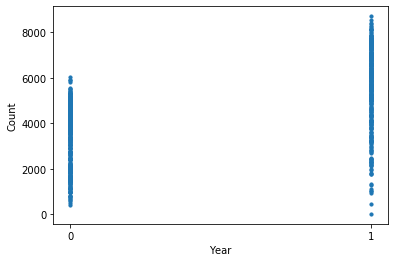

In [33]:
# check relationship between count and year

plt.scatter(x=df['yr'], y=df['cnt'], s=10)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

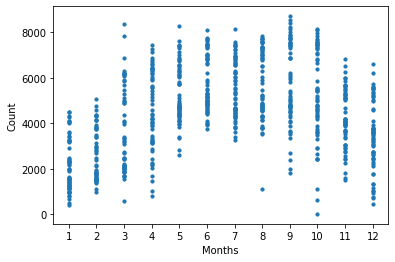

In [34]:
# check relationship between count and month

plt.scatter(x=df['mnth'], y=df['cnt'], s=10)
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

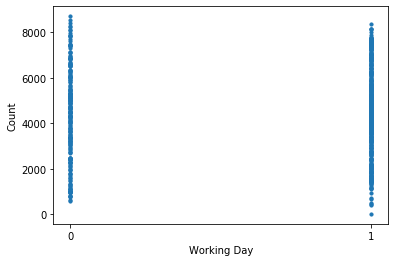

In [35]:
# check relationship between count and working day

plt.scatter(x=df['workingday'], y=df['cnt'], s=10)
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()

(array([ 4., 23., 45., 94., 83., 71., 59., 74., 91., 94., 63., 16.]),
 array([0.0591304 , 0.12600845, 0.1928865 , 0.25976455, 0.3266426 ,
        0.39352065, 0.4603987 , 0.52727675, 0.5941548 , 0.66103285,
        0.7279109 , 0.79478895, 0.861667  ]),
 <a list of 12 Patch objects>)

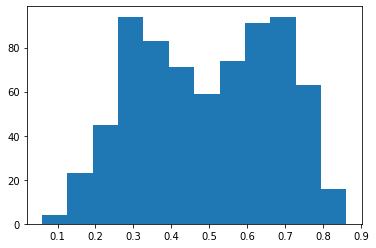

In [36]:
# check histogram of temp variable

plt.hist(df['temp'], bins='auto')

(array([ 3.,  8.,  9., 28., 46., 83., 70., 83., 80., 81., 77., 51., 42.,
        28., 20.,  8.]),
 array([0.254167  , 0.29906281, 0.34395863, 0.38885444, 0.43375025,
        0.47864606, 0.52354188, 0.56843769, 0.6133335 , 0.65822931,
        0.70312513, 0.74802094, 0.79291675, 0.83781256, 0.88270837,
        0.92760419, 0.9725    ]),
 <a list of 16 Patch objects>)

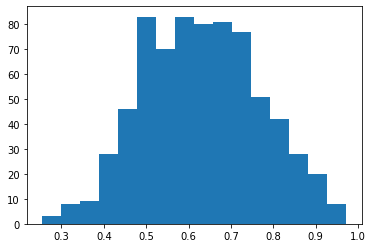

In [37]:
# check histogram of hum variable

plt.hist(df['hum'], bins='auto')

(array([ 2., 18., 31., 34., 69., 83., 85., 84., 63., 74., 52., 30., 28.,
        23., 11., 19., 11.]),
 array([0.0223917 , 0.04331619, 0.06424068, 0.08516516, 0.10608965,
        0.12701414, 0.14793863, 0.16886312, 0.18978761, 0.21071209,
        0.23163658, 0.25256107, 0.27348556, 0.29441005, 0.31533454,
        0.33625902, 0.35718351, 0.378108  ]),
 <a list of 17 Patch objects>)

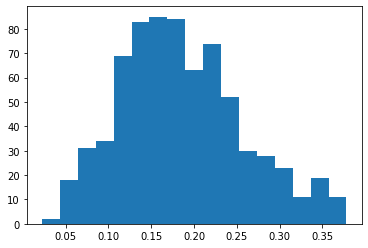

In [38]:
# check histogram of windspeed variable

plt.hist(df['windspeed'], bins='auto')

In [39]:
#Dummy Variable creation for categorical variables

categorical_var = ['season', 'yr', 'mnth', 'workingday', 'weathersit']
df = pd.get_dummies(data = df,columns=categorical_var)

In [40]:
#taking copy of the data

df_dummy = df.copy()
#df = df_dummy.copy()

In [41]:
X = df.iloc[:,:8].values
Y = df.iloc[:,8].values

#Splitting the data in train and testing

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(573, 8)
(144, 8)
(573,)
(144,)


<b>Linear Regression</b>

In [43]:
# Build model on train data
LR = LinearRegression().fit(X_train , y_train)

In [44]:
# predict on train data
pred_train_LR = LR.predict(X_train)

In [45]:
# predict on test data
pred_test_LR = LR.predict(X_test)

In [46]:
# Model Evaluation

# calculate RMSE on train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

# calculate RMSE on test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

In [47]:
print("RMSE on training data = "+str(RMSE_train_LR))
print("RMSE on test data = "+str(RMSE_test_LR))

RMSE on training data = 0.3299448661499039
RMSE on test data = 0.31426835567976236


In [48]:
# calculate R^2 on train data
r2_train_LR = r2_score(y_train, pred_train_LR)

# calculate R^2 on test data
r2_test_LR = r2_score(y_test, pred_test_LR)

In [49]:
print("r2 on training data = "+str(r2_train_LR))
print("r2 on test data = "+str(r2_test_LR))

r2 on training data = 0.5645123818119517
r2 on test data = 0.6042545443906986


#### Decision Tree Model

In [50]:
# Build model on train data
DT = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)

In [51]:
# predict on train data
pred_train_DT = DT.predict(X_train)

# predict on test data
pred_test_DT = DT.predict(X_test)

In [52]:
# Model Evaluation

# calculate RMSE on train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

# calculate RMSE on test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [53]:
print("RMSE on training data = "+str(RMSE_train_DT))
print("RMSE on test data = "+str(RMSE_test_DT))

RMSE on training data = 0.358183632206061
RMSE on test data = 0.3566912603924434


In [54]:
# calculate R^2 on train data
r2_train_DT = r2_score(y_train, pred_train_DT)

# calculate R^2 on test data
r2_test_DT = r2_score(y_test, pred_test_DT)

In [55]:
print("r2 on training data = "+str(r2_train_DT))
print("r2 on test data = "+str(r2_test_DT))

r2 on training data = 0.4867788642114833
r2 on test data = 0.4902003101325807


#### Random Forest Model

In [56]:
# Build model on train data
RF = RandomForestRegressor(n_estimators = 300).fit(X_train, y_train)

In [57]:
# predict on train data
pred_train_RF = RF.predict(X_train)

# predict on test data
pred_test_RF = RF.predict(X_test)

In [58]:
# Model Evaluation

# calculate RMSE on train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

# calculate RMSE on test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [59]:
print("RMSE on training data = "+str(RMSE_train_RF))
print("RMSE on test data = "+str(RMSE_test_RF))

RMSE on training data = 0.1028847061018335
RMSE on test data = 0.28001598278899004


In [60]:
# calculate R^2 on train data
r2_train_RF = r2_score(y_train, pred_train_RF)

# calculate R^2 on test data
r2_test_RF = r2_score(y_test, pred_test_RF)

In [61]:
print("r2 on training data = "+str(r2_train_RF))
print("r2 on test data = "+str(r2_test_RF))

r2 on training data = 0.9576557247754114
r2 on test data = 0.6858187439613527


#### Gradient Boosting

In [62]:
# Build model on train data
GB = GradientBoostingRegressor().fit(X_train, y_train)

In [63]:
# predict on train data
pred_train_GB = GB.predict(X_train)

# predict on test data
pred_test_GB = GB.predict(X_test)

In [64]:
# Model Evaluation

# calculate RMSE on train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))

# calculate RMSE on test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [65]:
print("RMSE on training data = "+str(RMSE_train_GB))
print("RMSE on test data = "+str(RMSE_test_GB))

RMSE on training data = 0.1594547970892351
RMSE on test data = 0.2792557268448661


In [66]:
# calculate R^2 on train data
r2_train_GB = r2_score(y_train, pred_train_GB)

# calculate R^2 on test data
r2_test_GB = r2_score(y_test, pred_test_GB)

In [67]:
print("r2 on training data = "+str(r2_train_GB))
print("r2 on test data = "+str(r2_test_GB))

r2 on training data = 0.8982889261407009
r2 on test data = 0.6875224603688559


#### Applying Hyper-parameter Tuning for optimizing the results

##### there are two ways to apply hyper-parameter tuning
##### 1. RandomizedSearchCV
##### 2. GridSearchCV

In [68]:
# 1. RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# RandomizedSearchCV on Random Forest Model

RFR = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator, 'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RFR, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train, y_train)
predictions_RFR = randomcv_rf.predict(X_test)

best_params_RFR = randomcv_rf.best_params_

best_estimator_RFR = randomcv_rf.best_estimator_

predictions_RFR = best_estimator_RFR.predict(X_test)

# calculate R^2
RFR_r2 = r2_score(y_test, predictions_RFR)

# calculate RMSE
RFR_rmse = np.sqrt(mean_squared_error(y_test, predictions_RFR))

print('RandomizedSearchCV - Random Forest Regressor Model Performance:')
print('Best Parameters = ',best_params_RFR)
print('R-squared = {:0.2}.'.format(RFR_r2))
print('RMSE = ',RFR_rmse)

RandomizedSearchCV - Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.68.
RMSE =  0.28327012826866393


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


In [69]:
# RandomizedSearchCV on gradient boosting model

GBR = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator, 'max_depth': depth}

randomcv_gb = RandomizedSearchCV(GBR, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train, y_train)
predictions_gb = randomcv_gb.predict(X_test)

best_params_gb = randomcv_gb.best_params_

best_estimator_gb = randomcv_gb.best_estimator_

predictions_gb = best_estimator_gb.predict(X_test)

# calculate R^2
gb_r2 = r2_score(y_test, predictions_gb)

# calculate RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test, predictions_gb))

print('RandomizedSearchCV - Gradient Boosting Model Performance:')
print('Best Parameters = ',best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

RandomizedSearchCV - Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.58.
RMSE =  0.32253627379745264


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


In [70]:
# 2. GridSearchCV

from sklearn.model_selection import GridSearchCV

# GridSearchCV on Random Forest Model

rfr_gs = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator, 'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(rfr_gs, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)

best_params_GRF = gridcv_rf.best_params_
best_estimator_GRF = gridcv_rf.best_estimator_

#Apply model on test data
predictions_GRF = best_estimator_GRF.predict(X_test)

# calculate R^2
GRF_r2 = r2_score(y_test, predictions_GRF)

# calculate RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test, predictions_GRF))


print('GridSearchCV - Random Forest Regressor Model Performance:')
print('Best Parameters = ',best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

GridSearchCV - Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.68.
RMSE =  0.2809943682553387


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


In [71]:
# GridSearchCV on gradient boosting model

gbr_gs = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator, 'max_depth': depth}

# Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gbr_gs, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)

best_params_Ggb = gridcv_gb.best_params_
best_estimator_Ggb = gridcv_gb.best_estimator_

#Apply model on test data
predictions_Ggb = best_estimator_Ggb.predict(X_test)

# calculate R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)

# calculate RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test, predictions_Ggb))


print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.7.
RMSE =  0.2754111563439019


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
